In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [121]:
df = pd.read_csv('EDA_data.csv')

In [122]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,Job State,Age,Python,Spark,Excel,Tableau,AWS,SQL,seniority,Len_Job Description
0,Data Analyst,74.000,Description of Roles and Responsibilities:\n· ...,4.0,DONIA LLC,"New York, NY",51 to 200 Employees,-1,Company - Public,-1,...,NY,-1,0,0,0,0,0,0,na,396
1,Telecaller & Data Analyst,120.000,"Telecalling,Data Updation\nGood communication ...",-1.0,Shubh Labh Vivah Sanstha,Remote,-1,-1,-1,-1,...,Remote,-1,0,0,0,0,0,0,na,159
2,Data Analyst,70.000,The Data Analysts should have broad range expe...,4.2,"Dfuse Technologies, Inc.",Remote,Unknown,-1,Company - Private,Internet & Web Services,...,Remote,-1,0,0,0,0,0,0,na,718
3,Data Analyst,85.000,Data Analyst\nJob Role:\nWorking with cross-fu...,-1.0,Edrex,Remote,-1,-1,-1,-1,...,Remote,-1,0,0,0,0,0,0,na,496
4,data analyst,79.286,"responsibilities:\nPerform data modeling, data...",4.0,Lead5 Media,"Newark, CA",1 to 50 Employees,2009,Company - Private,Advertising & Public Relations,...,CA,14,0,0,0,0,0,0,na,503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Data Analyst,55.877,Job Description\nUnder the direction of the De...,3.4,Cleveland Community College,"Shelby, NC",501 to 1000 Employees,-1,College / University,Colleges & Universities,...,NC,-1,0,0,1,0,0,0,na,527
100,Jr. Business Data Analyst,47.000,"Hi there! We're WebFX, a full-service digital ...",4.3,webfx.com,"Harrisburg, PA",501 to 1000 Employees,1995,Company - Private,Internet & Web Services,...,PA,28,0,0,0,0,0,0,junior,900
101,Jr Data Analyst,66.331,Job Description :\nThe Jr. Data Analyst will b...,3.9,Veracity Software,"Iselin, NJ",51 to 200 Employees,2010,Company - Private,Information Technology Support Services,...,NJ,13,0,0,0,0,0,0,junior,413
102,Data Analyst (BV552501),73.000,NOTE: All applicants must comply with ICL/NYC’...,3.1,ICL Inc,"Brooklyn, NY",Unknown,1986,Nonprofit Organization,Health Care Services & Hospitals,...,NY,37,0,0,0,0,0,0,na,927


In [123]:
df_model = df[['Rating', 'Industry', 'Size', 'Sector', 'Revenue','Python', 'Spark', 'Excel', 'Tableau', 'AWS', 'SQL',
       'Type of ownership',  'Salary Estimate', 'Job State', 'Age', 'Len_Job Description', 'seniority']]

In [124]:
df_dum = pd.get_dummies(df_model, drop_first=True)
df_dum.columns

Index(['Rating', 'Python', 'Spark', 'Excel', 'Tableau', 'AWS', 'SQL',
       'Salary Estimate', 'Age', 'Len_Job Description',
       ...
       'Job State_ NY', 'Job State_ OH', 'Job State_ OR', 'Job State_ PA',
       'Job State_ TN', 'Job State_ TX', 'Job State_ VA', 'Job State_Remote',
       'seniority_na', 'seniority_senior'],
      dtype='object', length=112)

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X = df_dum.drop('Salary Estimate', axis=1)
y = df_dum['Salary Estimate'].values

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [128]:
import statsmodels.api as sm

In [129]:
X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm.astype(float))
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.872
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     1.443
Date:                Thu, 01 Jun 2023   Prob (F-statistic):              0.191
Time:                        20:15:30   Log-Likelihood:                -372.01
No. Observations:                 104   AIC:                             916.0
Df Residuals:                      18   BIC:                             1143.
Df Model:                          85                                         
Covariance Type:            nonrobust                                         
======================================================================================================================
                                                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------------------
const                                                  3.4843     26.866      0.130      0.898     -52.960      59.928
Rating                                                -6.0172      3.677     -1.637      0.119     -13.742       1.707
Python                                                18.4211     33.587      0.548      0.590     -52.142      88.984
Spark                                                 21.3919     38.669      0.553      0.587     -59.849     102.633
Excel                                                -10.8334     21.332     -0.508      0.618     -55.651      33.984
Tableau                                               47.3772     22.695      2.088      0.051      -0.303      95.057
AWS                                                  -15.1775     18.903     -0.803      0.433     -54.892      24.537
SQL                                                    8.7865     24.991      0.352      0.729     -43.717      61.290
Age                                                    0.1255      0.129      0.975      0.343      -0.145       0.396
Len_Job Description                                    0.0037      0.016      0.236      0.816      -0.029       0.037
Industry_Accounting & Tax                              2.4116     13.886      0.174      0.864     -26.761      31.584
Industry_Advertising & Public Relations               15.5081     27.901      0.556      0.585     -43.111      74.127
Industry_Aerospace & Defense                          34.7093     24.195      1.435      0.169     -16.123      85.542
Industry_Banking & Lending                           -40.0045     40.102     -0.998      0.332    -124.256      44.247
Industry_Beauty & Wellness                            24.9820     30.728      0.813      0.427     -39.575      89.539
Industry_Biotech & Pharmaceuticals                    -3.7510     15.081     -0.249      0.806     -35.434      27.932
Industry_Business Consulting                          21.5908     11.569      1.866      0.078      -2.716      45.897
Industry_Colleges & Universities                       0.2419     10.915      0.022      0.983     -22.689      23.173
Industry_Computer Hardware Development                16.6390     18.774      0.886      0.387     -22.804      56.082
Industry_Consumer Electronics & Appliances Stores     11.2511     38.879      0.289      0.776     -70.432      92.934
Industry_Consumer Product Manufacturing               40.8905     49.740      0.822      0.422     -63.610     145.391
Industry_Department, Clothing & Shoe Stores          -24.8276     17.511     -1.418      0.173     -61.616      11.961
Industry_Electronics Manufacturing                   -11.2708     29.835     -0.378      0.710     -73.951  

In [130]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [131]:
np.mean(cross_val_score(lm, X_train, y_train, scoring="neg_mean_absolute_error", cv=3))

-51.43096001194386

In [132]:
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train, y_train)
np.mean(cross_val_score(lm_l, X_train, y_train, scoring="neg_mean_absolute_error", cv=3))

-22.685844714478645

C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.534e+03, tolerance: 3.230e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.378e+01, tolerance: 2.711e+00
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider incre

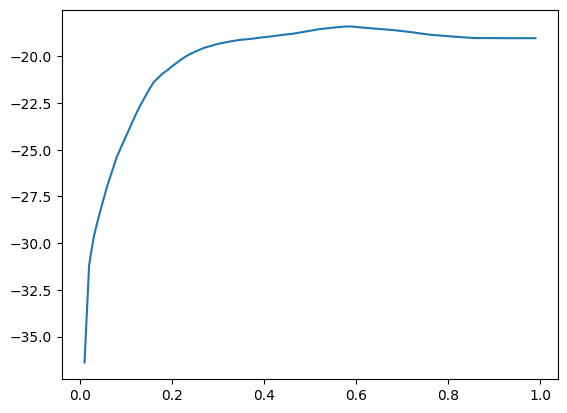

In [133]:
alpha = []
error = []

for i in range(1, 100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml, X_train, y_train, scoring="neg_mean_absolute_error", cv=3)))

plt.plot(alpha, error)

In [134]:
err = tuple(zip(alpha, error))
df_err = pd.DataFrame(err, columns= ['alpha', 'error'])
df_err[df_err['error'] == max(df_err['error'])]

,alpha,error
57,0.58,-18.40116


In [135]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,  X_train, y_train, scoring="neg_mean_absolute_error", cv=3))

-19.529863544973548

In [136]:

from sklearn.model_selection import GridSearchCV
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','absolute_error'), 'max_features':('auto','sqrt','log2')}

gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(X_train,y_train)


C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
C:\Users\user\AppData\Roaming\Python\Python311\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this param

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'absolute_error'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [137]:
gs.best_score_

-18.735856172839508

In [138]:
gs.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_features='sqrt',
                      n_estimators=10)

In [139]:
tpred_lm = lm.predict(X_test)
tpred_lml = lm_l.predict(X_test)
tpred_rf = gs.best_estimator_.predict(X_test)

from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm)
mean_absolute_error(y_test,tpred_lml)
mean_absolute_error(y_test,tpred_rf)

mean_absolute_error(y_test,(tpred_lm+tpred_rf)/2)

36.8397460059236